In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("D:\SETA\ENERGY\data\ISEM_scraped_historical_data_raw.csv")
df["Time Start (WET)"] = pd.to_datetime(df["Time Start (WET)"])

# 1. Target analysis

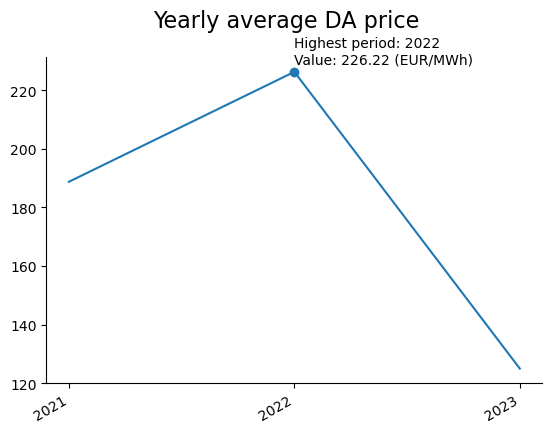

In [13]:
grouped = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='Y'))["DA Prices-IRELAND (IE) [EUR/MWh]"].mean()
peak_time = grouped.sort_values(ascending = False).index[0]
peak_value = grouped.max()
fig, ax = plt.subplots()
ax.plot(grouped)
ax.scatter([peak_time], [peak_value])
annotation = f"Highest period: {peak_time.year} \nValue: {round(peak_value, 2)} (EUR/MWh)"
ax.set_xticks(grouped.index)
ax.set_xticklabels(grouped.index.year)
ax.annotate(annotation, (peak_time, peak_value + 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle("Yearly average DA price", size = 16)
fig.autofmt_xdate()

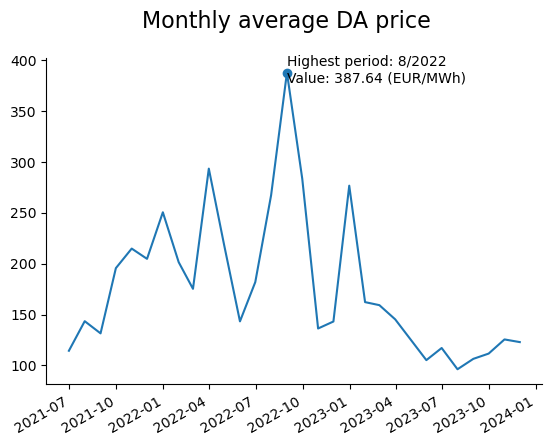

In [14]:
grouped = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))["DA Prices-IRELAND (IE) [EUR/MWh]"].mean()
peak_time = grouped.sort_values(ascending = False).index[0]
peak_value = grouped.max()
fig, ax = plt.subplots()
ax.plot(grouped)
ax.scatter([peak_time], [peak_value])
annotation = f"Highest period: {peak_time.month}/{peak_time.year} \nValue: {round(peak_value, 2)} (EUR/MWh)"
ax.annotate(annotation, (peak_time, peak_value - 9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle("Monthly average DA price", size = 16)
fig.autofmt_xdate()

**Insight:** 

The main challenge in forecasting price for the whole 2023 is that the price is too different from 2022 because of recent shock in the market. There are two main reasons for the shock:

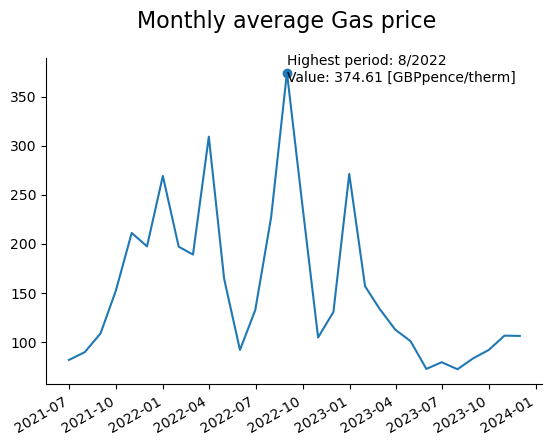

In [15]:
grouped = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))["SPECTRON GAS > Prevailing Gas Price-OFFER [GBPpence/therm]"].mean()
peak_time = grouped.sort_values(ascending = False).index[0]
peak_value = grouped.max()
fig, ax = plt.subplots()
ax.plot(grouped)
ax.scatter([peak_time], [peak_value])
annotation = f"Highest period: {peak_time.month}/{peak_time.year} \nValue: {round(peak_value, 2)} [GBPpence/therm]"
ax.annotate(annotation, (peak_time, peak_value - 9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle("Monthly average Gas price", size = 16)
fig.autofmt_xdate()

The first reason is the rising gas price as energy suppliers must pay to buy gas on the world market. The reduced supply can be linked to events like conflicts in Europe.

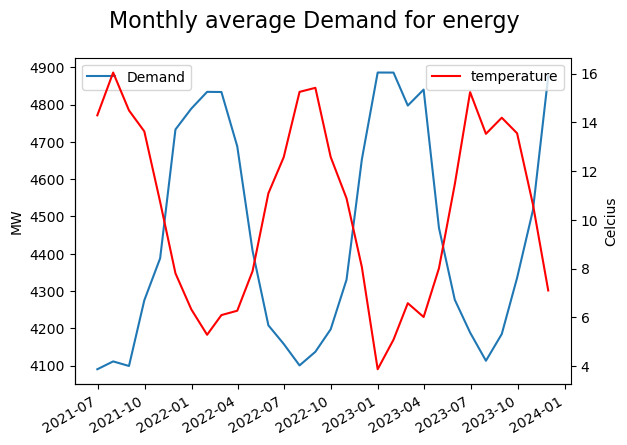

In [16]:
grouped = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))["DEMAND SUMMARY-ACTUAL TOTAL LOAD [MW]"].mean()
grouped_temp = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))['WEATHER > Air Temp Forecast-ACTUAL GFS FORECAST [Celcius]'].mean()
peak_time = grouped.sort_values(ascending = False).index[0]
peak_value = grouped.max()
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(grouped, label = "Demand")
ax.set_ylabel("MW")

ax2.plot(grouped_temp, color = "red", label = "temperature")
ax2.set_ylabel("Celcius")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2.legend()
ax.legend()
fig.suptitle("Monthly average Demand for energy", size = 16)
fig.autofmt_xdate()

The second reason is the increased demand from the cold winter (when temperature drop, the energy demand increase).

In summary, supply couldn't meet demand and the price shot up.


# 2. Renewable trend

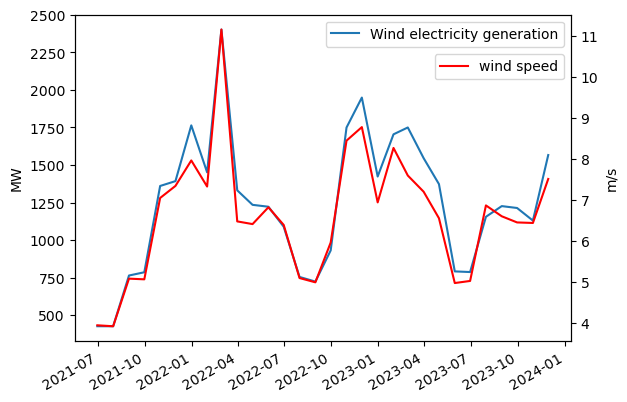

In [48]:
grouped = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))["GENERATION > Realtime Generation Summary-WIND [MW]"].mean()
grouped2 = df.groupby(pd.Grouper(key = 'Time Start (WET)', freq='M'))["WEATHER > Wind Speed-ACTUAL GFS FORECAST [m/s]"].mean()
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(grouped, label = "Wind electricity generation")
ax.set_ylabel("MW")
ax2.plot(grouped2, color = "red", label = "wind speed")
ax2.set_ylabel("m/s")
ax.legend()
ax2.legend(bbox_to_anchor=(1, 0.9))
fig.autofmt_xdate()

**Insight:**
- Power generated from renewable source (solar and wind) is heavily influenced by weather.

# 3. Demmand

c:\Users\DELL24H.VN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Demand summary')

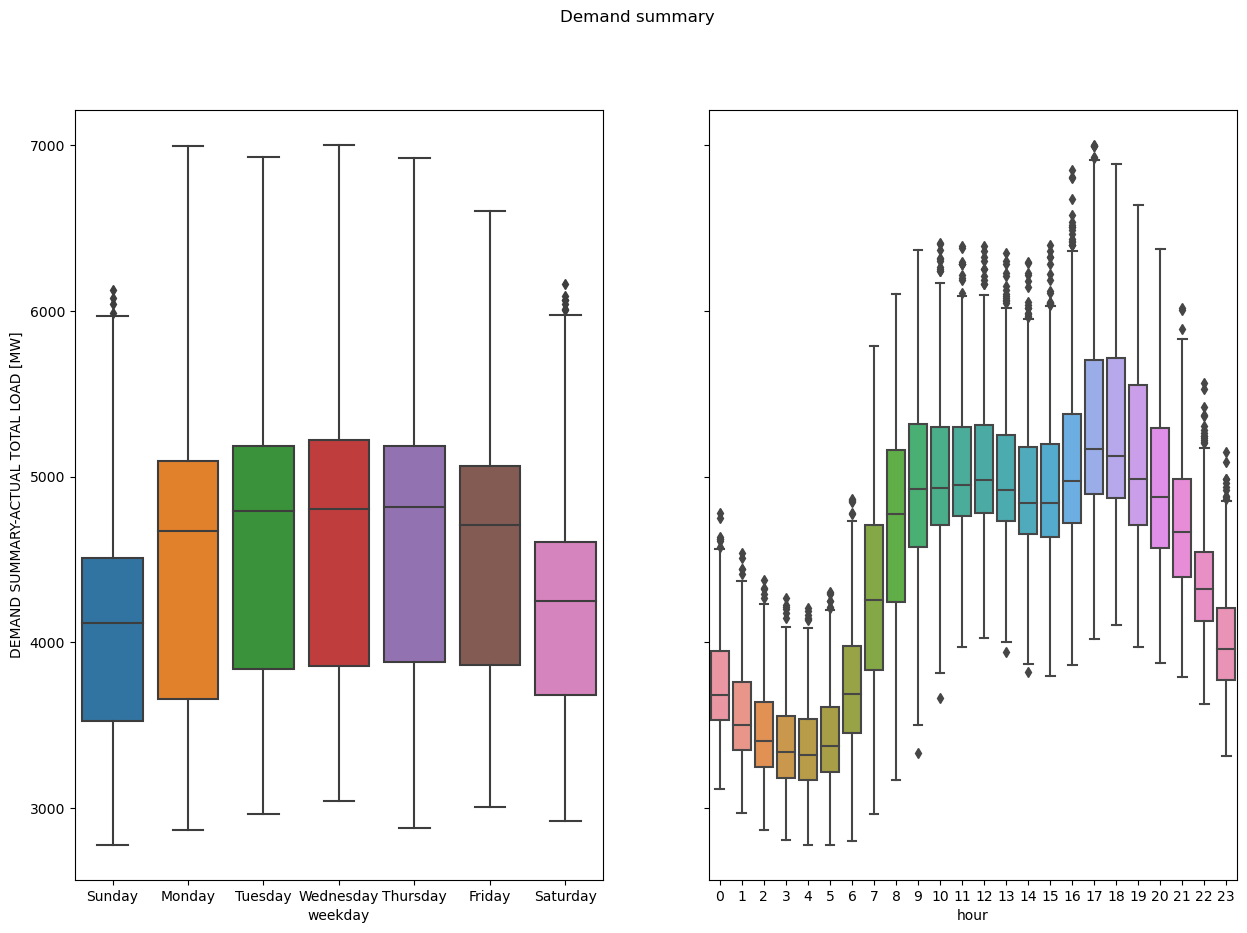

In [ ]:
df["weekday"] = df["Time Start (WET)"].dt.day_name()
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10), sharey = True)
df["hour"] = df["Time Start (WET)"].dt.hour
sns.boxplot(df["weekday"],df["DEMAND SUMMARY-ACTUAL TOTAL LOAD [MW]"], ax = ax1)
sns.boxplot(df["hour"],df["DEMAND SUMMARY-ACTUAL TOTAL LOAD [MW]"], ax = ax2)
ax2.set_ylabel(None)
fig.suptitle("Demand summary")

**Insight:**
- On average, demand for energy is higher in weekdays than on weekends.
- On each day, there are two peaks in demand (in the morning at 9am and in the evening at 6pm)

<AxesSubplot:xlabel='hour'>

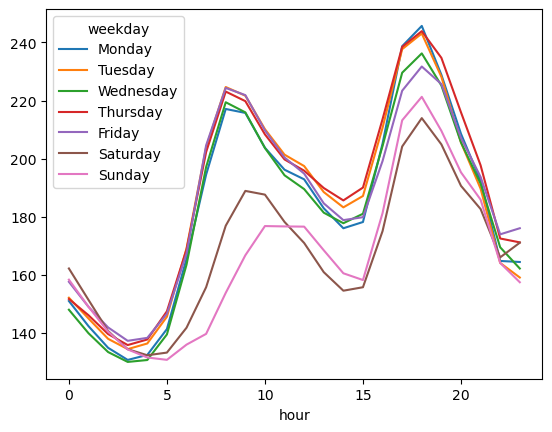

In [ ]:
pivot = df.pivot_table(values = "DA Prices-IRELAND (IE) [EUR/MWh]", columns="weekday", index = "hour", aggfunc=np.mean)
pivot = pivot[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
pivot.plot()

**Insight:**
- Pattern in energy price is similar to demand (peaks in the morning and evening; price on weekends is lower)